In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 전처리 - Titanic 생존자 자료

In [3]:
df = pd.read_csv('./data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. 명목형자료 변환

### 1.1 수치 맵핑 변환

In [13]:
# replace
df.Sex.replace(['male','female'],[0,1], inplace=True)
df.Sex.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

### 1.2 Dummy 기법

In [11]:
pd.get_dummies(df.Embarked).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


## 2. 수치형자료 변환

### 2.1 정규화(Normalization)

In [16]:
def normal(data):
    data= (data-min(data))/(max(data)-min(data))
    return data

print(df.Fare.head())
Fare = normal(df.Fare)
print(Fare.head())

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64
0    0.014151
1    0.139136
2    0.015469
3    0.103644
4    0.015713
Name: Fare, dtype: float64


### 2.2 정규화(Standardzation)

In [17]:
def standard(data):
    data = (data - data.mean())/data.std()
    return data
print(df.Fare.head())
Standard = standard(df.Fare)
print(Standard.head())

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64
0   -0.502163
1    0.786404
2   -0.488580
3    0.420494
4   -0.486064
Name: Fare, dtype: float64


## 3. 결측치 처리
- 결측치 : Cabin, Age, Embarked 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [21]:
# 1. Cabin 변수 제거
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [23]:
# 2. NaN가 포함된 row 제거
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 66.8+ KB


## 4. 이상치 처리

<AxesSubplot:>

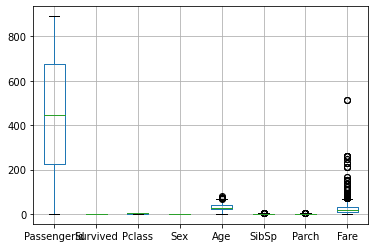

In [29]:
df.boxplot()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 66.8+ KB


In [50]:
# Age : float64 형태. 소수점 자리 확인
outlier_age = (df.Age - np.floor(df.Age)) >0
df[outlier_age].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
57,58,0,3,"Novel, Mr. Mansouer",0,28.50,0,0,2697,7.2292,C
78,79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,S
111,112,0,3,"Zabour, Miss. Hileni",1,14.50,1,0,2665,14.4542,C
116,117,0,3,"Connors, Mr. Patrick",0,70.50,0,0,370369,7.7500,Q
122,123,0,2,"Nasser, Mr. Nicholas",0,32.50,1,0,237736,30.0708,C


In [60]:
df_final = df[~outlier_age]

# 모델링

## 1. 데이터

In [81]:
# split data set : train data, test data


from sklearn.model_selection import train_test_split

X= df_final.drop(columns='Survived')
y= df_final['Survived']

# train:test=7:3
train_X, test_X , train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

print('train data set: %d' %len(train_X))
print('test data set: %d' %len(test_X))

train data set: 480
test data set: 207
